In [1]:
import numpy as np
import pandas as pd

In [3]:

df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5000 non-null   object
 1   dateAdded            5000 non-null   object
 2   name                 5000 non-null   object
 3   asins                5000 non-null   object
 4   brand                5000 non-null   object
 5   categories           5000 non-null   object
 6   reviews.date         5000 non-null   object
 7   reviews.doRecommend  5000 non-null   bool  
 8   reviews.rating       5000 non-null   int64 
 9   reviews.text         5000 non-null   object
 10  reviews.title        4987 non-null   object
 11  reviews.username     5000 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 434.7+ KB


(5000, 12)

In [5]:
df.isnull().sum()

id                      0
dateAdded               0
name                    0
asins                   0
brand                   0
categories              0
reviews.date            0
reviews.doRecommend     0
reviews.rating          0
reviews.text            0
reviews.title          13
reviews.username        0
dtype: int64

Find the overall ratings in the list of reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


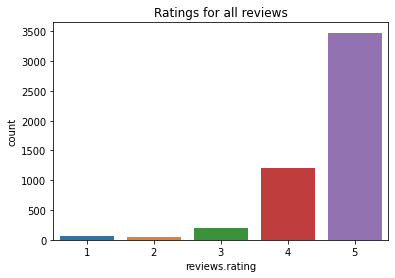

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['reviews.rating'])
plt.ylabel=('count')
plt.xlabel=('rating')
plt.title('Ratings for all reviews')
plt.show()
plt.close()

In [7]:
#Converting Emojis to their Respective Emotions
df["reviews.text"] = df["reviews.text"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)
df_products=df[['id','name']]
df_products = df_products.drop_duplicates()
df_products=df_products.reset_index()
del df_products['index']

In [18]:
#Extract all reviews
reviews=df['reviews.text'].reset_index()
del reviews['index']

def convert_to_string(df1):
  narr = df1.to_numpy()
  print(len(narr))
  sentence=''
  for s in narr:
    sentence+=s[0]
    sentence+=' '
  return sentence

all_reviews=convert_to_string(reviews)


5000


Text pre-processing i.e., tokanize, lemmatize, remove stop words

In [19]:
import nltk
from nltk import tokenize
from nltk import word_tokenize
from nltk import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
sentences=tokenize.sent_tokenize(all_reviews)
sentences[0:5]

['I thought it would be as big as small paper but turn out to be just like my palm.',
 'I think it is too small to read on it... not very comfortable as regular Kindle.',
 'Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end."]

In [21]:
words1 = [word_tokenize(sent.lower()) for sent in sentences]
words2 = [item for sublist in words1 for item in sublist]

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
wnl=WordNetLemmatizer()
words3=[wnl.lemmatize(w) for w in words2]

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_w=stopwords.words('english')

stop_w2=['wa','ha','one','use','show','doe']
stop_w=stop_w+stop_w2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
words4=[w for w in words3 if w not in stop_w and w.isalnum()]

Find Frequency Distribution of words

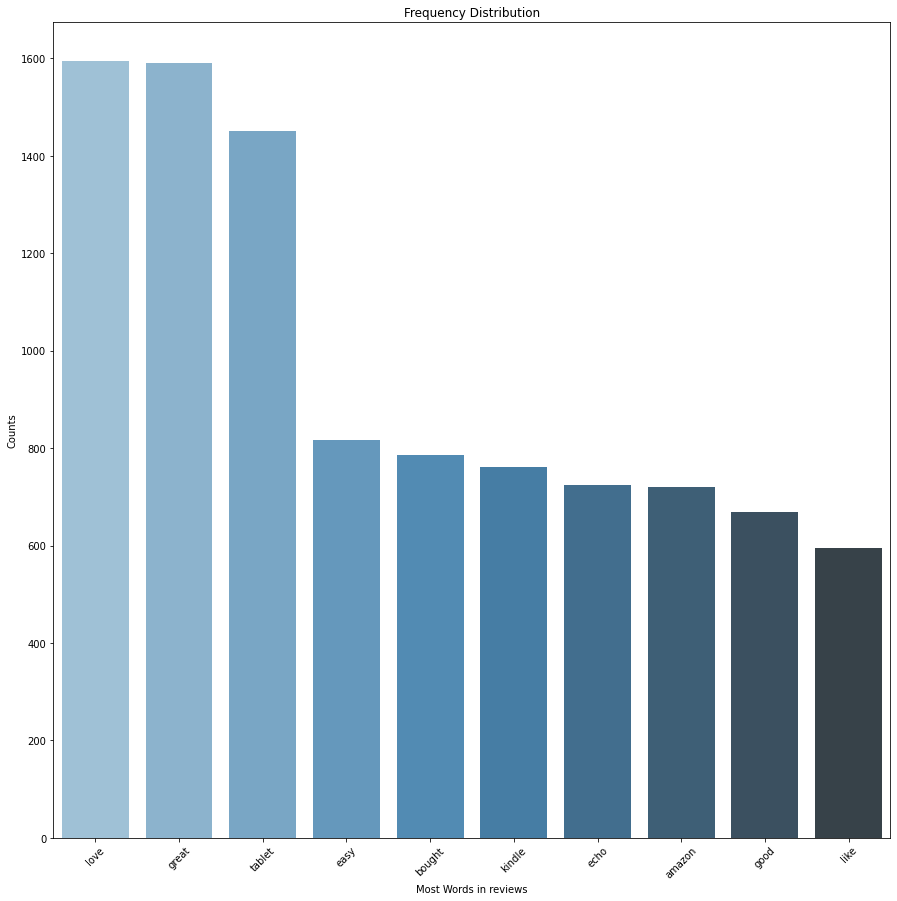

In [28]:
all_fdist = nltk.FreqDist(words4).most_common(10)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(15,15))

frpl1 = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax,palette="Blues_d")
plt.xticks(rotation=45);
frpl1.set(xlabel='Most Words in reviews', ylabel='Counts', title='Frequency Distribution')
frpl1

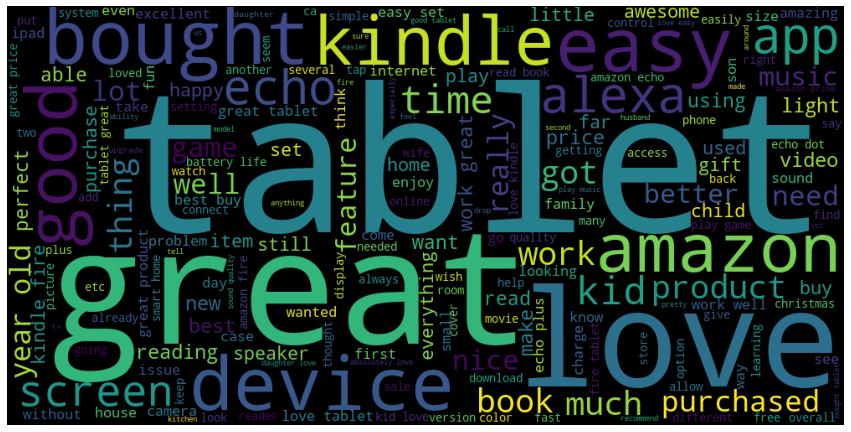

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(words4)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [30]:
import spacy


Create word cloud from review texts for individual products

In [31]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
groupdata=df.groupby(['name']).filter(lambda x: len(x)>300).reset_index(drop=True)
# lemmatization and removal of stop words
groupdata['reviews.text']=groupdata['reviews.text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
groupdata=groupdata[['name','reviews.text']].groupby(by='name').agg(lambda x:' '.join(x))


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(groupdata['reviews.text'])
group_df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
group_df.index=groupdata.index




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


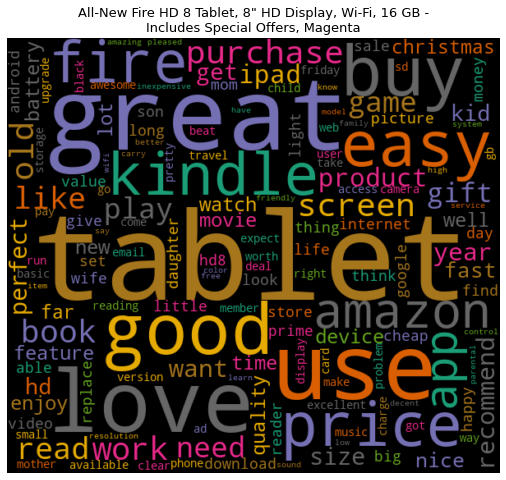

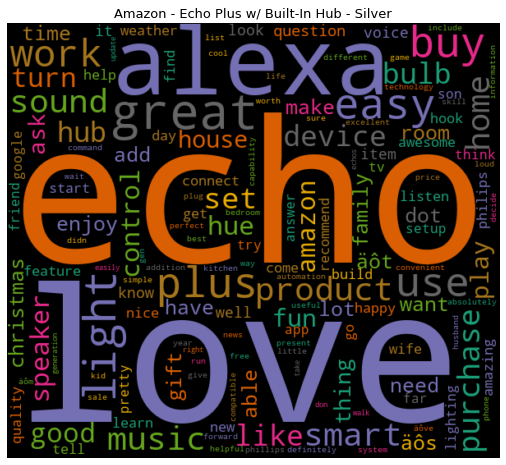

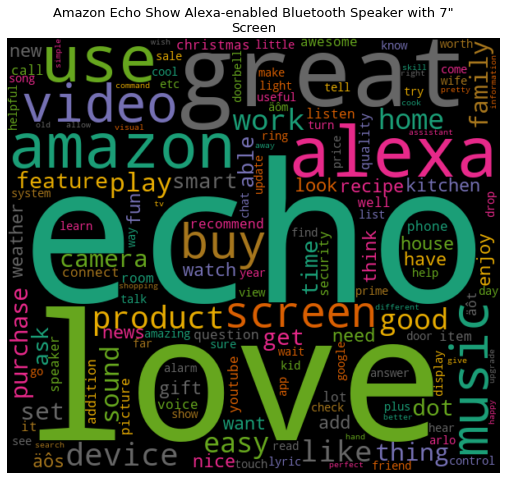

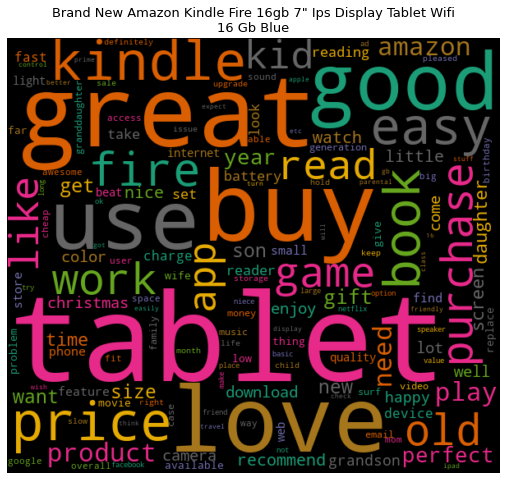

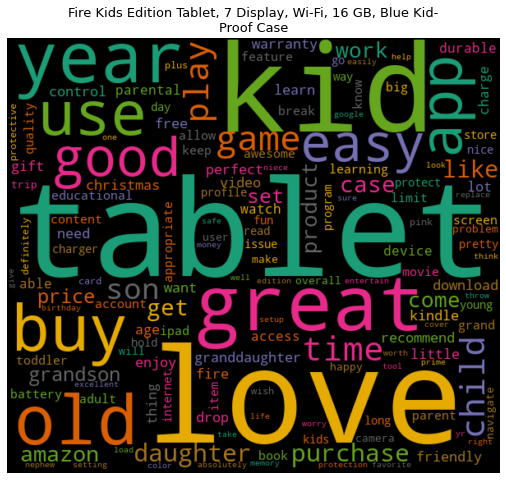

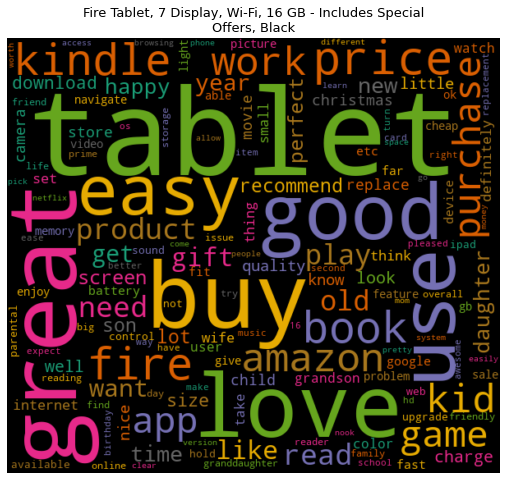

In [33]:
from textwrap import wrap
from textblob import TextBlob
def wordcloud(data,title):
  wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
group_df=group_df.transpose()

for index,product in enumerate(group_df.columns):
  wordcloud(group_df[product].sort_values(ascending=False),product)

Create co-occurence network for the word "connect"

In [34]:
nodes1 = [word_tokenize(sent.lower()) for sent in sentences]
nodes2=[]
for k in nodes1:
  nodes2.append([w for w in k if w not in stop_w and w.isalnum()])

In [35]:
import networkx as nx
G = nx.Graph()
for sublist in nodes2:
  edlis=[]
  for i in range(len(sublist)-1):
    edlis.append((sublist[i],sublist[i+1]))
  G.add_edges_from(edlis)


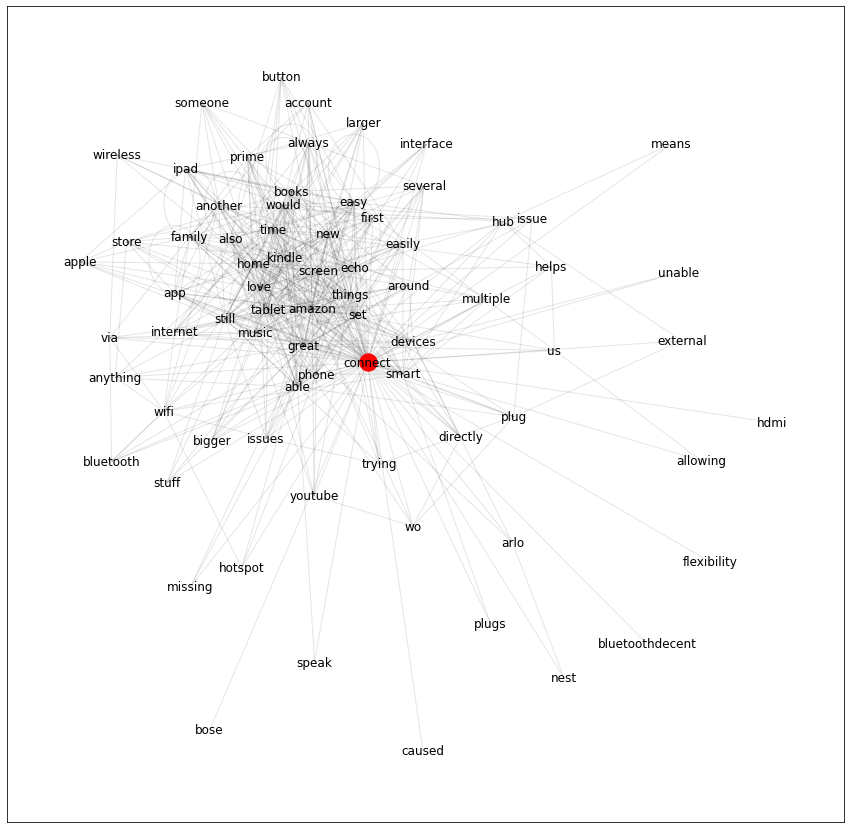

In [36]:
nod = 'connect'
neig = list(G.neighbors(nod))
neig.append('connect')
H=G.subgraph(neig)
plt.figure(3,figsize=(15,15)) 
pos = nx.spring_layout(H)
#nx.draw(H,pos, with_labels=True, font_size=12)
nx.draw_networkx_edges(H, pos,alpha=0.1)
nx.draw_networkx_nodes(H,pos,node_color="red", nodelist=['connect'],alpha=1.0)
nx.draw_networkx_labels(H, pos,font_size=12,alpha=1.0)
plt.show()

Find centrality for the words and sort them in descending order.

In [37]:
deg = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
pag = nx.pagerank(G)
dataf = pd.DataFrame([deg,clo,pag]).transpose()
dataf.columns = ["Degree", "Closeness", "PageRank"]
dataf

,Degree,Closeness,PageRank
thought,0.011381,0.387586,0.000650
would,0.059414,0.449449,0.003731
big,0.016204,0.393127,0.001010
small,0.022184,0.407055,0.001424
paper,0.004437,0.351989,0.000291
...,...,...,...
taplet,0.000193,0.318292,0.000040
handheld,0.000193,0.252862,0.000042
6yr,0.000386,0.298241,0.000051
title,0.000386,0.305592,0.000050


In [38]:
dataf.sort_values(by=['Degree'], inplace=True, ascending=False)
print(dataf.head(10))

          Degree  Closeness  PageRank
tablet  0.119599   0.483540  0.007784
great   0.109761   0.484083  0.007163
amazon  0.090085   0.467155  0.006004
love    0.078897   0.468044  0.004785
like    0.078318   0.462765  0.005199
kindle  0.077739   0.461567  0.004859
echo    0.074846   0.455106  0.004714
alexa   0.074074   0.456836  0.004663
easy    0.073881   0.459434  0.004636
good    0.071566   0.461361  0.004565


In [39]:
dataf.sort_values(by=['Closeness'], inplace=True, ascending=False)
print(dataf.head(10))

          Degree  Closeness  PageRank
great   0.109761   0.484083  0.007163
tablet  0.119599   0.483540  0.007784
love    0.078897   0.468044  0.004785
amazon  0.090085   0.467155  0.006004
like    0.078318   0.462765  0.005199
kindle  0.077739   0.461567  0.004859
good    0.071566   0.461361  0.004565
easy    0.073881   0.459434  0.004636
get     0.068094   0.458822  0.004317
alexa   0.074074   0.456836  0.004663


In [40]:
dataf.sort_values(by=['PageRank'], inplace=True, ascending=False)
print(dataf.head(10))

          Degree  Closeness  PageRank
tablet  0.119599   0.483540  0.007784
great   0.109761   0.484083  0.007163
amazon  0.090085   0.467155  0.006004
like    0.078318   0.462765  0.005199
kindle  0.077739   0.461567  0.004859
love    0.078897   0.468044  0.004785
echo    0.074846   0.455106  0.004714
alexa   0.074074   0.456836  0.004663
easy    0.073881   0.459434  0.004636
good    0.071566   0.461361  0.004565


Find the similarity of review texts for 3 products: Fire HD 8 Tablet, Echo, Kindle

In [41]:
products=[]
for index,product in enumerate(group_df.columns):
  products.append(product)
  print(product)

product1=products[0]
product2=products[1]
product3=products[3]

product1_text=df[df['name']==product1]
product1_text=product1_text['reviews.text'].reset_index()
del product1_text['index']

product2_text=df[df['name']==product2]
product2_text=product2_text['reviews.text'].reset_index()
del product2_text['index']

product3_text=df[df['name']==product3]
product3_text=product3_text['reviews.text'].reset_index()
del product3_text['index']

prod1_review=convert_to_string(product1_text)
prod2_review=convert_to_string(product2_text)
prod3_review=convert_to_string(product3_text)

X=[prod1_review,prod2_review,prod3_review]

print(X)

All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
Amazon - Echo Plus w/ Built-In Hub - Silver
Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen
Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black
797
590
467
['This was bought to replace my old Kindle with keypad, and experimental internet. Was surprised how much the Kindle had changed, and at the same price as my old one was when I bought it!Have already shown it to a couple of friends who now say they are thinking about getting one. outstanding replacement tablet for my outdated and overpriced iPad 2 This is a great tablet for the price. I have one that I purchased a few years ago and use it much more than my laptop. Recently purchased two more for gifts. She hasn\'t used the it yet, but my son did a quick check and it seems

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

TfidfVectorizer()

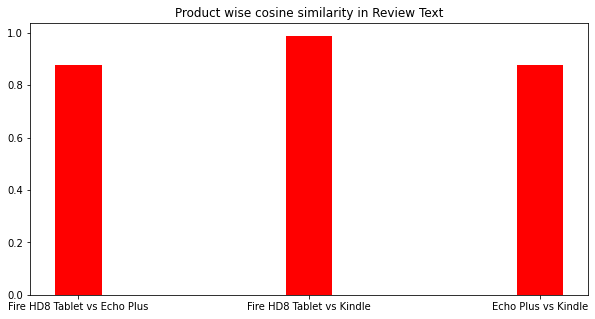

In [44]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
A = tfidf_vectorizer.transform(X).toarray()
Sim1=np.dot(A[0],A[1])/(np.linalg.norm(A[0]) * np.linalg.norm(A[1]))
Sim2=np.dot(A[0],A[2])/(np.linalg.norm(A[0]) * np.linalg.norm(A[2]))
Sim3=np.dot(A[1],A[2])/(np.linalg.norm(A[1]) * np.linalg.norm(A[2]))
similarity=[Sim1,Sim2,Sim3]
fig = plt.figure(figsize = (10, 5))
X_labels=['Fire HD8 Tablet vs Echo Plus','Fire HD8 Tablet vs Kindle','Echo Plus vs Kindle']
plt.bar(X_labels, similarity, color='red',width=0.2)
plt.xlabel=('Products')
plt.ylabel=('Text Similarity-Cosine ')
plt.title('Product wise cosine similarity in Review Text')
plt.show()

In [45]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
#Converting Emojis to their Respective Emotions
df["reviews.text"] = df["reviews.text"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)
#shuffle the dataset
df= df.sample(frac=1).reset_index(drop=True)
df_copy=df.copy()
#taking only relevant columns
df_copy.drop(['id','reviews.doRecommend', 'dateAdded','name','asins','brand','categories','reviews.date','reviews.title','reviews.username'], axis=1, inplace=True)


Convert the ratings 4,5 to 1, i.e. positive and 1-3 as 0 i.e. negative

In [46]:
df_copy['rating']=0
for i in range(0,len(df_copy)):
    if (df_copy.at[i,'reviews.rating']>=4):
        df_copy['rating'][i] = 1
    else:
        df_copy['rating'][i] = 0
df_copy.drop(['reviews.rating'], axis=1, inplace=True)
df_copy.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  5000 non-null   object
 1   rating        5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [47]:
pip install NRCLex


     |████████████████████████████████| 396 kB 6.8 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=f62d93c1bc52043174be08520203d208bee22046b8533c7ef350c364bb34e07e
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


Extract review texts from positively rated reviews and negatively rated reviews separately

In [48]:
positive_reviews=df_copy.loc[df_copy['rating'] == 1,'reviews.text'].reset_index()
del positive_reviews['index']
negative_reviews=df_copy.loc[df_copy['rating'] == 0,'reviews.text'].reset_index()
del negative_reviews['index']

def convert_to_string(df1):
  narr = df1.to_numpy()
  print(len(narr))
  sentence=''
  for s in narr:
    sentence+=s[0]
    sentence+=' '
  return sentence

neg_reviews=convert_to_string(negative_reviews)
pos_reviews=convert_to_string(positive_reviews)

314
4686


Tokenize, lemmatize and remove stop words from the review texts

In [49]:
import nltk
from nltk import tokenize
from nltk import word_tokenize
from nltk import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_w=stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import SnowballStemmer
import re
import string
stop_w2=['wa','ha','one','use','show','doe','u']
stop_w3=["a", "an", "the", "this", "that", "is", "it", "to", "and"]
stop_w=stop_w+stop_w2+stop_w3
wnl=WordNetLemmatizer()
snow = SnowballStemmer('english')

def get_words(reviews):

  sentences=tokenize.sent_tokenize(reviews)
  words1 = [word_tokenize(sent.lower()) for sent in sentences]
  words2 = [item for sublist in words1 for item in sublist]
  words3=[wnl.lemmatize(w) for w in words2]
  words4=[w for w in words3 if w not in stop_w and w.isalnum()]
  stemmed_sentence = []
  for w in words4:
    stemmed_sentence.append(snow.stem(w))
  text = " ".join(stemmed_sentence)  
  return text
  
pos_words=get_words(pos_reviews)
neg_words=get_words(neg_reviews)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Extract emotion scores for the words from positive review texts and negative texts

In [50]:
from nrclex import NRCLex


emotion = NRCLex(pos_words)
pos_emotions=emotion.raw_emotion_scores

emotion1 = NRCLex(neg_words)
neg_emotions=emotion1.raw_emotion_scores

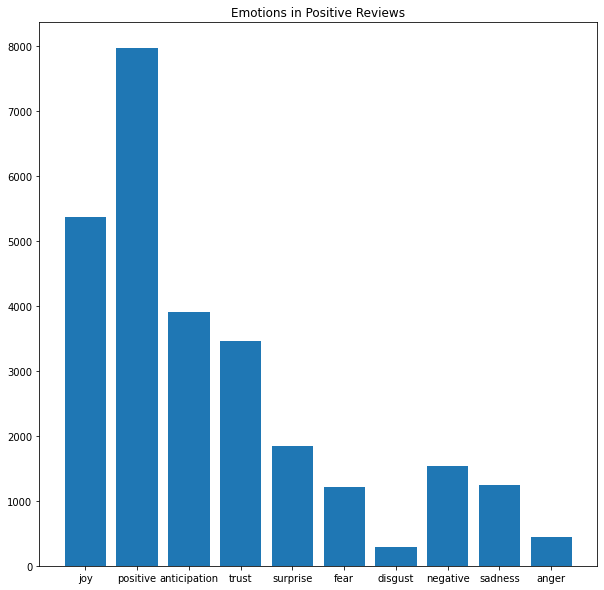

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(list(pos_emotions.keys()), list(pos_emotions.values()))
plt.ylabel=('count')
plt.xlabel=('emotions')
plt.title('Emotions in Positive Reviews')
plt.show()

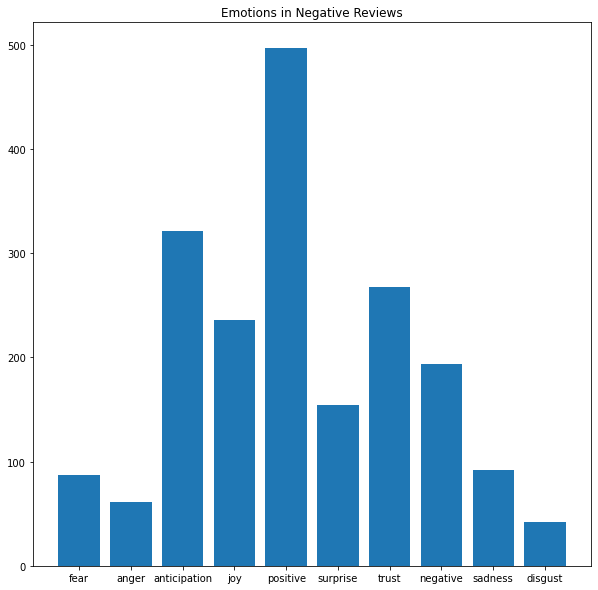

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(list(neg_emotions.keys()), list(neg_emotions.values()))
plt.ylabel=('count')
plt.xlabel=('emotions')
plt.title('Emotions in Negative Reviews')
plt.show()

Predict whether the consumer recommended the product by analyzing the sentiments of the customers’ review texts using VADER Sentiment Intensity Analyzer 

In [53]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
#Converting Emojis to their Respective Emotions
df["reviews.text"] = df["reviews.text"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)
#shuffle the dataset
df= df.sample(frac=1).reset_index(drop=True)
df_copy=df.copy()
#taking only relevant columns
df_copy.drop(['id', 'dateAdded','name','asins','brand','categories','reviews.date','reviews.title','reviews.username'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


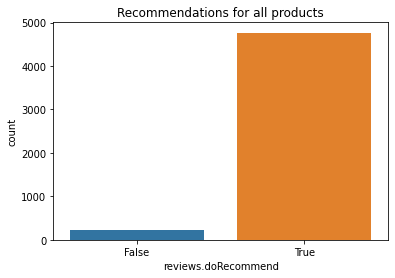

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['reviews.doRecommend'])
plt.ylabel=('count')
plt.xlabel=('Recommendation')
plt.title('Recommendations for all products')
plt.show()
plt.close()

Convert "Reviews Recommend" column which is categorical to numerical

In [55]:

df_copy['sentiment.compound']=0.0
df_copy['sentiment.positive']=0.0
df_copy['sentiment.negative']=0.0
df_copy['sentiment.neutral']=0.0

df_copy['Recommend']=0


for i in range(0,len(df_copy)):
    if (df_copy.at[i,'reviews.doRecommend']==True):
        df_copy['Recommend'][i] = 1
    else:
        df_copy['Recommend'][i] = 0
df_copy.drop(['reviews.doRecommend'], axis=1, inplace=True)
df_copy.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviews.rating      5000 non-null   int64  
 1   reviews.text        5000 non-null   object 
 2   sentiment.compound  5000 non-null   float64
 3   sentiment.positive  5000 non-null   float64
 4   sentiment.negative  5000 non-null   float64
 5   sentiment.neutral   5000 non-null   float64
 6   Recommend           5000 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 273.6+ KB


In [56]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Use polarity scores for each review text to build training dataset

In [57]:
for i in range(0,len(df_copy)):
  text=df_copy.at[i,'reviews.text']
  d=sid.polarity_scores(text)
  df_copy['sentiment.compound'][i] = d['compound']
  df_copy['sentiment.positive'][i] = d['pos']
  df_copy['sentiment.negative'][i] = d['neg']
  df_copy['sentiment.neutral'][i] = d['neu']
df_copy.drop(['reviews.text'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [58]:
y=df_copy['Recommend']
X=df_copy[['reviews.rating','sentiment.compound','sentiment.positive','sentiment.negative','sentiment.neutral']]

k fold stratified partioning

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize


X = preprocessing.StandardScaler().fit(X).transform(X)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3,
                             random_state=0)
sss.get_n_splits(X, y)


5

Random Forest classifier

[0.9786666666666667, 0.9813333333333333, 0.976, 0.9773333333333334, 0.974]
[[0.62  0.38 ]
 [0.008 0.992]]


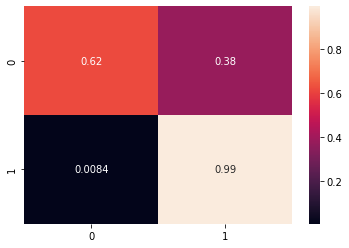

In [61]:
scores = []
rf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, pred)
    scores.append(accuracy_score(y_test, pred))
print(scores)
cf_normed = normalize(cf_matrix, axis=1, norm='l1')
print(cf_normed)
DataFrame_cm = pd.DataFrame(cf_normed)
sns.heatmap(DataFrame_cm, annot=True)
plt.show()

Naive Bayes Classifier

[0.9406666666666667, 0.9453333333333334, 0.9353333333333333, 0.9426666666666667, 0.938]


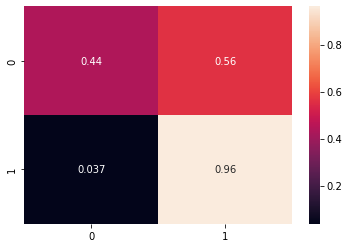

In [62]:
from sklearn.naive_bayes import BernoulliNB
scores1=[]
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bnb = BernoulliNB(binarize=0.0)
    bnb.fit(X_train, y_train)
    pred1=bnb.predict(X_test)
    cf_matrix1 = confusion_matrix(y_test, pred1)
    scores1.append(bnb.score(X_test, y_test))
print(scores1)
cf_normed1 = normalize(cf_matrix1, axis=1, norm='l1')

DataFrame_cm1 = pd.DataFrame(cf_normed1)
sns.heatmap(DataFrame_cm1, annot=True)
plt.show()

Predict whether the consumer recommended the product by analyzing the sentiments of the customers’ review texts using TF-IDF vectorized values of review texts

In [63]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
#Converting Emojis to their Respective Emotions
df["reviews.text"] = df["reviews.text"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)
#shuffle the dataset
df= df.sample(frac=1).reset_index(drop=True)
df_copy=df.copy()
#taking only relevant columns
df_copy.drop(['id', 'dateAdded','name','asins','brand','categories','reviews.date','reviews.title','reviews.username','reviews.rating'], axis=1, inplace=True)


Convert "Reviews Recommend" column which is categorical to numerical

In [65]:
df_copy['Recommend']=0

for i in range(0,len(df_copy)):
    if (df_copy.at[i,'reviews.doRecommend']==True):
        df_copy['Recommend'][i] = 1
    else:
        df_copy['Recommend'][i] = 0
df_copy.drop(['reviews.doRecommend'], axis=1, inplace=True)
df_copy.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  5000 non-null   object
 1   Recommend     5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


Data pre processing

In [66]:
import nltk
from nltk import tokenize
from nltk import word_tokenize
from nltk import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_w=stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import SnowballStemmer
import re
import string
stop_w2=['wa','ha','one','use','show','doe','u']
stop_w3=["a", "an", "the", "this", "that", "is", "it", "to", "and"]
stop_w=stop_w+stop_w2+stop_w3
wnl=WordNetLemmatizer()
snow = SnowballStemmer('english')

for i in range(0,len(df_copy)):
  sentences=tokenize.sent_tokenize(df_copy.at[i,'reviews.text'])
    
 
  words1 = [word_tokenize(sent.lower()) for sent in sentences]
  words2 = [item for sublist in words1 for item in sublist]
  words3=[wnl.lemmatize(w) for w in words2]
  words4=[w for w in words3 if w not in stop_w and w.isalnum()]
  stemmed_sentence = []
  for w in words4:
    stemmed_sentence.append(snow.stem(w))
  text = " ".join(stemmed_sentence)
  
  
  df_copy.at[i,'reviews.text']=text
print(df_copy.head(2))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
                                        reviews.text  Recommend
0  bought tablet caus super cheap decemb good tab...          1
1  great kid easi block purchas even better amazo...          1


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
reviews_df=df_copy['reviews.text']
reviews_list = reviews_df.values.tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(reviews_list)
features = vectorizer.transform(reviews_list)
farray=features.toarray()
X=pd.DataFrame(farray)

y=df_copy['Recommend']


K fold stratified partitioning of dataset

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize


X = preprocessing.StandardScaler().fit(X).transform(X)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3,
                             random_state=0)
sss.get_n_splits(X, y)

5

Random Forest classifier

[0.9526666666666667, 0.954, 0.9533333333333334, 0.9533333333333334, 0.9526666666666667]
[[0. 1.]
 [0. 1.]]


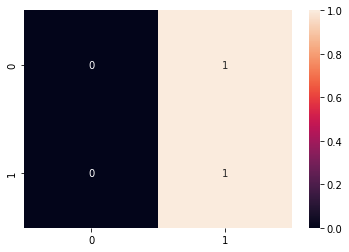

In [69]:
scores = []
rf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, pred)
    scores.append(accuracy_score(y_test, pred))
print(scores)
cf_normed = normalize(cf_matrix, axis=1, norm='l1')
print(cf_normed)
DataFrame_cm = pd.DataFrame(cf_normed)
sns.heatmap(DataFrame_cm, annot=True)
plt.show()

Naive Bayes Classifier

[0.9406666666666667, 0.9406666666666667, 0.928, 0.9426666666666667, 0.9306666666666666]


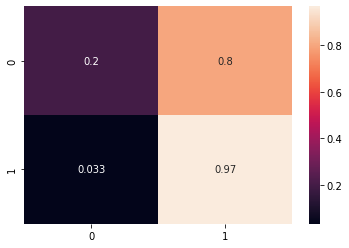

In [70]:
from sklearn.naive_bayes import BernoulliNB
scores1=[]
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bnb = BernoulliNB(binarize=0.0)
    bnb.fit(X_train, y_train)
    pred1=bnb.predict(X_test)
    cf_matrix1 = confusion_matrix(y_test, pred1)
    scores1.append(bnb.score(X_test, y_test))
print(scores1)
cf_normed1 = normalize(cf_matrix1, axis=1, norm='l1')

DataFrame_cm1 = pd.DataFrame(cf_normed1)
sns.heatmap(DataFrame_cm1, annot=True)
plt.show()